Carga de librerías del proyecto

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Automcompletar rápido
%config IPCompleter.greedy=True
#Desactivar la notación científica
pd.options.display.float_format = '{:.3f}'.format

#Google Drive
from google.colab import drive
drive.mount('/content/drive')

Cargar Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/BPA/TP/AmesHousing_dirty.csv", encoding='ISO-8859-1', sep=",")

Mostrar primeras filas

In [ ]:
df.head(10)

Correción de cabeceras

In [ ]:
columnas_renombrar = {
    'MS ZONING': 'MS Zoning',
    'LotFrontage': 'Lot Frontage',
    'LotAreaa': 'Lot Area',
    'SalePrrice': 'SalePrice'
}
df.rename(columns=columnas_renombrar, inplace=True)

comprobar cambios

In [ ]:
df.head(3)

Overview Data

In [ ]:
df.shape

In [ ]:
df.info()

 Hay constantes?

In [ ]:
df.nunique().sort_values(ascending=True)

Se borra columna pais

In [ ]:
df.drop(columns='pais', inplace=True)

comprobamos cambios

In [ ]:
df.nunique().sort_values(ascending=True)

Detectar duplicados

In [ ]:
df.duplicated().sum()

In [ ]:
df[df.duplicated()]

In [ ]:
df.drop_duplicates(inplace=True)

Data Type Mismatch

In [ ]:
df.dtypes

nulos por columna

Imputar los nulos de las columnas MS Zoning y Street


Imputar los nulos de la Columna SalePrice por la mediana

Outliers

Verificar DataFrame

Guardado

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("C:/Users/Sebastian/OneDrive/Documentos/vivienda-prediccion/data/DataTPClean.csv", encoding='ISO-8859-1', sep=",")

In [4]:
df.isnull().sum().sort_values(ascending=False) * 100 / len(df)

Pool QC           99.556617
Misc Feature      96.384720
Alley             93.246930
Fence             80.457026
Mas Vnr Type      60.572988
                    ...    
Mo Sold            0.000000
Yr Sold            0.000000
Sale Type          0.000000
Sale Condition     0.000000
SalePrice          0.000000
Length: 83, dtype: float64

In [5]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace(r"[^\w\s]", "", regex=True)
)


In [6]:
df.head(5)

,unnamed_0,order,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,...,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,sale_condition,saleprice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,404380.0
1,1,2,526350040,20,RH,80.0,999999,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000.0
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,160000.0
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000.0
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900.0


In [11]:

import seaborn as sb
import sklearn
import matplotlib.pyplot as plt

In [12]:
df.describe()

,unnamed_0,order,pid,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remodadd,...,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2932.00000,2932.000000,2.932000e+03,2932.000000,2442.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,...,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000,2932.000000
mean,1465.50000,1464.501364,7.143362e+08,57.361869,69.258395,10492.899045,6.094475,5.563097,1971.348909,1984.250341,...,93.807299,47.522169,22.995907,2.590723,16.032060,2.241814,50.600614,6.215553,2007.791951,179588.913029
std,846.53982,846.537460,1.887304e+08,42.634655,23.401891,19909.373770,1.410691,1.111235,30.236372,20.862405,...,126.339567,67.466614,64.119988,25.132843,56.101899,35.585082,566.152574,2.713662,1.317428,75425.537364
min,0.00000,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,732.75000,731.750000,5.284733e+08,20.000000,58.000000,7440.750000,5.000000,5.000000,1954.000000,1965.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129837.500000
50%,1465.50000,1464.500000,5.354532e+08,50.000000,68.000000,9444.500000,6.000000,5.000000,1973.000000,1993.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2198.25000,2197.250000,9.071811e+08,70.000000,80.000000,11557.750000,7.000000,6.000000,2001.000000,2004.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213000.000000
max,2931.00000,2930.000000,1.007100e+09,190.000000,313.000000,999999.000000,10.000000,9.000000,2010.000000,2010.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,404380.000000


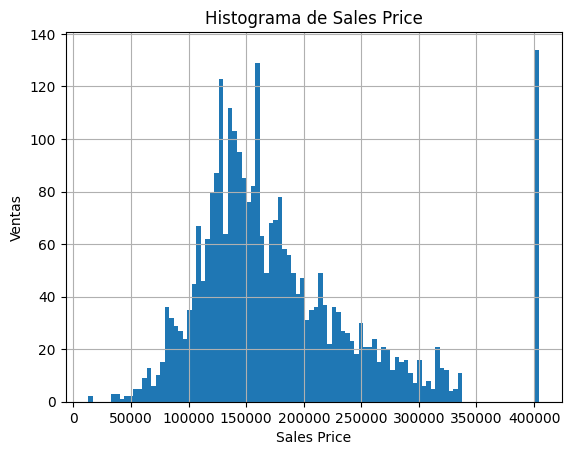

In [13]:
df.saleprice.hist(bins=100)
plt.title("Histograma de Sales Price")
plt.xlabel('Sales Price')
plt.ylabel('Ventas');

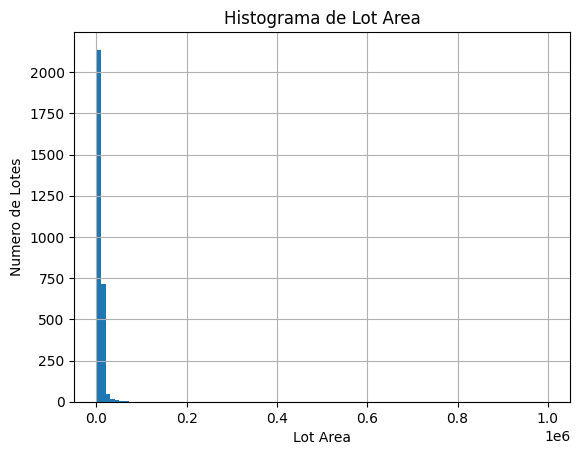

In [14]:
df.lot_area.hist(bins=100)
plt.title("Histograma de Lot Area")
plt.xlabel('Lot Area')
plt.ylabel('Numero de Lotes');

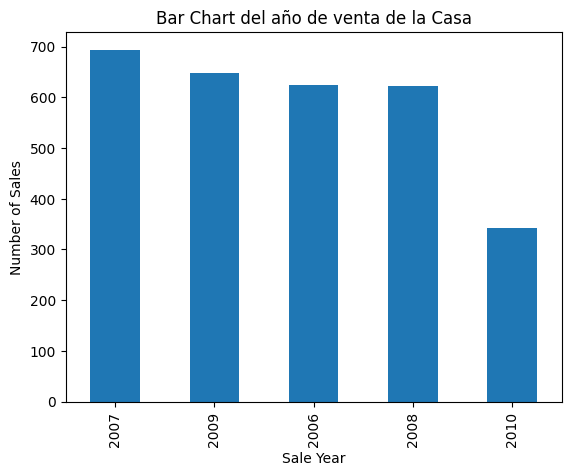

In [15]:
df['yr_sold'].value_counts().plot(kind='bar')
plt.title("Bar Chart del año de venta de la Casa")
plt.xlabel('Sale Year')
plt.ylabel('Number of Sales');

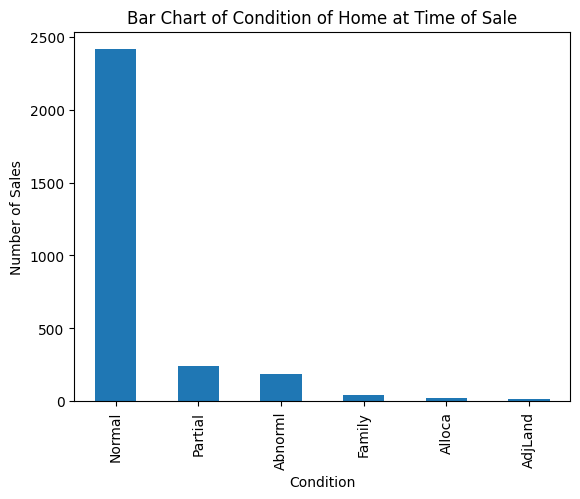

In [16]:
df['sale_condition'].value_counts().plot(kind='bar')
plt.title("Bar Chart of Condition of Home at Time of Sale")
plt.xlabel('Condition')
plt.ylabel('Number of Sales');

Chequeamos las correlaciones

In [17]:
df_num = df.select_dtypes(include='number')

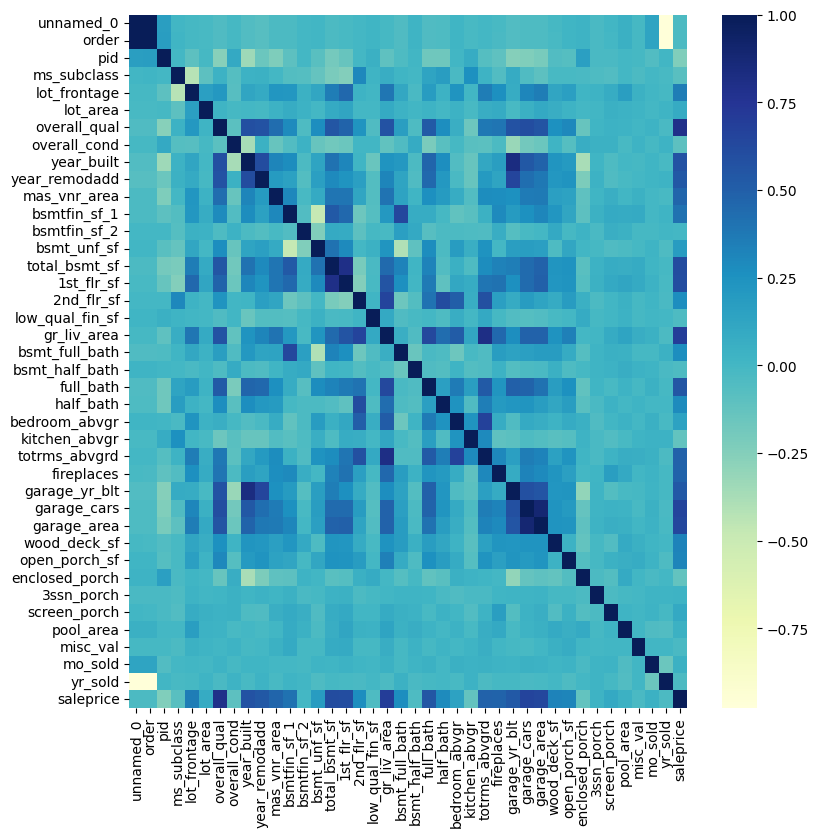

In [18]:
plt.figure(figsize=(9, 9))

dataplot = sb.heatmap(df_num.corr(), xticklabels=df_num.corr().columns, yticklabels=df_num.corr().columns,  cmap="YlGnBu", annot=False)
plt.savefig('corr.png', bbox_inches="tight")
plt.show();

In [19]:
 df = df.drop(columns=['order'])

In [21]:
# Total de metros cuadrados (primer piso + segundo piso + sótano)
df['total_sf'] = (
    df['1st_flr_sf'] +
    df['2nd_flr_sf'] +
    df['total_bsmt_sf']
)

# Metros cuadrados terminados (excluye sótano sin terminar)
df['finished_sf'] = (
    df['1st_flr_sf'] +
    df['2nd_flr_sf'] +
    df['total_bsmt_sf'] -
    df['bsmt_unf_sf']
)

# Metros cuadrados útiles de alta calidad (excluye low quality finish)
df['quality_sf'] = (
    df['1st_flr_sf'] +
    df['2nd_flr_sf'] +
    df['total_bsmt_sf'] -
    df['low_qual_fin_sf']
)

# Total de baños (completos y medios baños, incluyendo sótano)
df['total_bath'] = (
    df['full_bath'] +
    0.5 * df['half_bath'] +
    df['bsmt_full_bath'] +
    0.5 * df['bsmt_half_bath']
)

# Total de dormitorios sobre rasante
df['total_bedrooms'] = df['bedroom_abvgr']

In [22]:
dfe = df.copy()

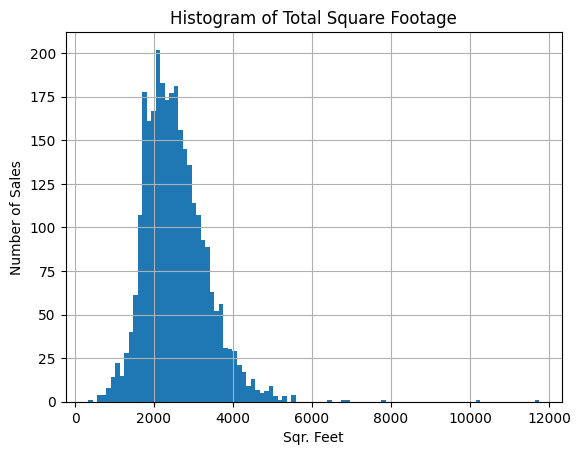

In [23]:
dfe.total_sf.hist(bins=100)
plt.title("Histogram of Total Square Footage")
plt.xlabel('Sqr. Feet')
plt.ylabel('Number of Sales');

In [24]:
numeric_cols = dfe.select_dtypes(include='number')

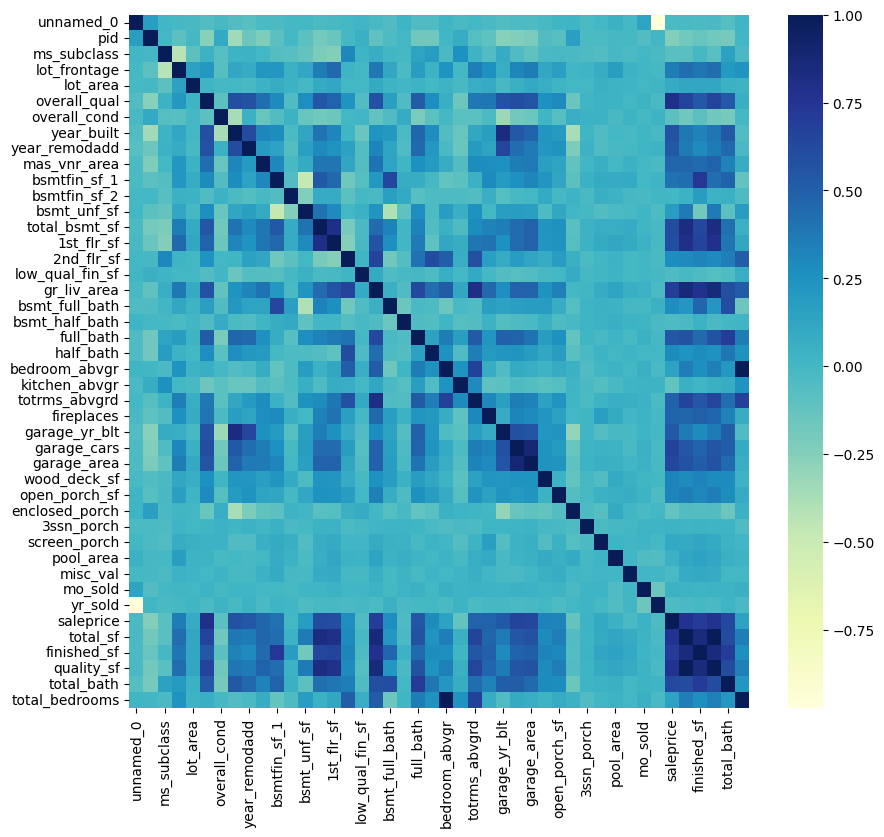

In [25]:

plt.figure(figsize=(10, 9))
dataplot = sb.heatmap(numeric_cols.corr(), cmap="YlGnBu", annot=False)
plt.show()

In [26]:
pt = numeric_cols[['lot_frontage',  'lot_area', 'mo_sold', 'yr_sold', 'saleprice', 'total_sf', 'finished_sf', 'total_bath', 'quality_sf']]

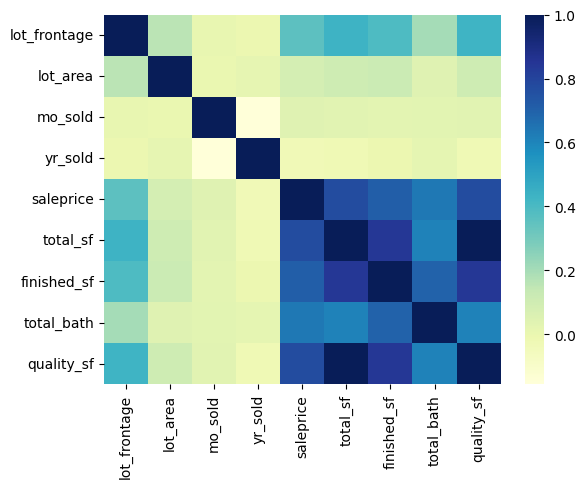

In [27]:
dataplot3 = sb.heatmap(pt.corr(), cmap="YlGnBu", annot=False)
plt.savefig('baby_corr.png', bbox_inches="tight")
plt.show()

In [28]:
# Copia del df original para trabajar con limpieza completa
df_clean = df.copy()

In [29]:
#En esta parte se eliminan las columnas con 50% o mas de datos faltantes
coverage = df_clean.isna().sum() / len(df_clean)
low_coverage_cols = coverage[coverage > 0.5].index.tolist()

df_clean.drop(columns=low_coverage_cols, inplace=True)

In [30]:
# Numéricos: imputamos con mediana
num_cols = df_clean.select_dtypes(include='number').columns
for col in num_cols:
    if df_clean[col].isna().sum() > 0:
        df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Categóricos: imputamos con "None"
cat_cols = df_clean.select_dtypes(include='object').columns
for col in cat_cols:
    if df_clean[col].isna().sum() > 0:
        df_clean[col].fillna("None", inplace=True)


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_27804\2032058706.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_27804\2032058706.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [31]:
df_clean.isnull().sum().sort_values(ascending=False) * 100 / len(df)

unnamed_0         0.0
pid               0.0
ms_subclass       0.0
ms_zoning         0.0
lot_frontage      0.0
                 ... 
total_sf          0.0
finished_sf       0.0
quality_sf        0.0
total_bath        0.0
total_bedrooms    0.0
Length: 82, dtype: float64

In [32]:
set(df.columns) - set(df_clean.columns)

{'alley', 'fence', 'mas_vnr_type', 'misc_feature', 'pool_qc'}

In [34]:
X = df_clean.drop(columns=['saleprice'])
y = df_clean['saleprice']

In [35]:
# Ignorar 'id' si la tienes
numeric_features = X.select_dtypes(include='number').columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Pipeline para numéricos
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

# Pipeline para categóricos
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="None")),
    ("encoder", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

In [37]:
preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

In [38]:
# Salida como DataFrame (en sklearn >= 1.2)
preprocessor.set_output(transform="pandas")

# Ajustar y transformar los datos
X_processed = preprocessor.fit_transform(X)

# Añadir 'sale_price' al resultado si deseas unirlos para modelar
df_model = X_processed.copy()
df_model['sale_price'] = y.values

In [39]:
df_model.head(5)

,num__unnamed_0,num__pid,num__ms_subclass,num__lot_frontage,num__lot_area,num__overall_qual,num__overall_cond,num__year_built,num__year_remodadd,num__mas_vnr_area,...,cat__sale_type_Oth,cat__sale_type_VWD,cat__sale_type_WD,cat__sale_condition_Abnorml,cat__sale_condition_AdjLand,cat__sale_condition_Alloca,cat__sale_condition_Family,cat__sale_condition_Normal,cat__sale_condition_Partial,sale_price
0,-1.731460,-0.996486,-0.876476,3.368872,1.068880,-0.066982,-0.506817,-0.375404,-1.162593,0.061236,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,404380.0
1,-1.730279,-0.996226,-0.876476,0.512781,49.708991,-0.775976,0.393236,-0.342325,-1.114651,-0.566029,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,105000.0
2,-1.729097,-0.996221,-0.876476,0.559602,0.189596,-0.066982,0.393236,-0.441560,-1.258475,0.038833,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,160000.0
3,-1.727916,-0.996210,-0.876476,1.121456,0.033513,0.642012,-0.506817,-0.110777,-0.779062,-0.566029,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,244000.0
4,-1.726734,-0.992225,0.061888,0.231854,0.167643,-0.775976,-0.506817,0.848497,0.659176,-0.566029,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,189900.0


In [40]:
# 1. Verificar nulos
print("🔍 Nulos totales:", df_model.isna().sum().sum())

# 2. Tipos de datos
print("📌 Tipos de datos únicos:", df_model.dtypes.unique())

# 3. Columnas no numéricas
non_numeric_cols = df_model.select_dtypes(exclude=['number']).columns
print("🧱 Columnas NO numéricas:", list(non_numeric_cols))

# 4. ¿SalePrice está como target?
print("'sale_price' en columnas:", 'sale_price' in df_model.columns)

# 5. Dimensiones
print("📐 Shape:", df_model.shape)

🔍 Nulos totales: 0
📌 Tipos de datos únicos: [dtype('float64')]
🧱 Columnas NO numéricas: []
'sale_price' en columnas: True
📐 Shape: (2932, 303)


ENTRENAMOS EL MODELO RANDONM FOREST.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from math import sqrt

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Separar X e y desde df_model
X = df_model.drop('sale_price', axis=1)
y = df_model['sale_price']

# División en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo Random Forest
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

# Predecir sobre el set de validación
rf_preds = reg.predict(X_val)

# Evaluación
rmse = sqrt(mean_squared_error(y_val, rf_preds))
r2 = r2_score(y_val, rf_preds)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R²: {r2:.4f}")

✅ RMSE: 25779.68
✅ R²: 0.9035


In [42]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Fijar semilla para reproducibilidad
np.random.seed(42)

# Entrenar el modelo Gradient Boosting
gbr = GradientBoostingRegressor(loss='squared_error', random_state=42)
gbr.fit(X_train, y_train)

# Predecir sobre el set de validación
gbr_preds = gbr.predict(X_val)

# Evaluación
gbr_rmse = sqrt(mean_squared_error(y_val, gbr_preds))
gbr_r2 = r2_score(y_val, gbr_preds)

print(f"🌲 Gradient Boosting RMSE: {gbr_rmse:.2f}")
print(f"🌲 Gradient Boosting R²: {gbr_r2:.4f}")

🌲 Gradient Boosting RMSE: 24882.45
🌲 Gradient Boosting R²: 0.9101


In [43]:
from sklearn.linear_model import LinearRegression

# Entrenar modelo lineal
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predecir sobre validación
lr_preds = lr.predict(X_val)

# Evaluación
lr_rmse = sqrt(mean_squared_error(y_val, lr_preds))
lr_r2 = r2_score(y_val, lr_preds)

print(f"📈 Linear Regression RMSE: {lr_rmse:.2f}")
print(f"📈 Linear Regression R²: {lr_r2:.4f}")

📈 Linear Regression RMSE: 27236.14
📈 Linear Regression R²: 0.8923


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_27804\1216785022.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Modelo', y='R²', palette='viridis')


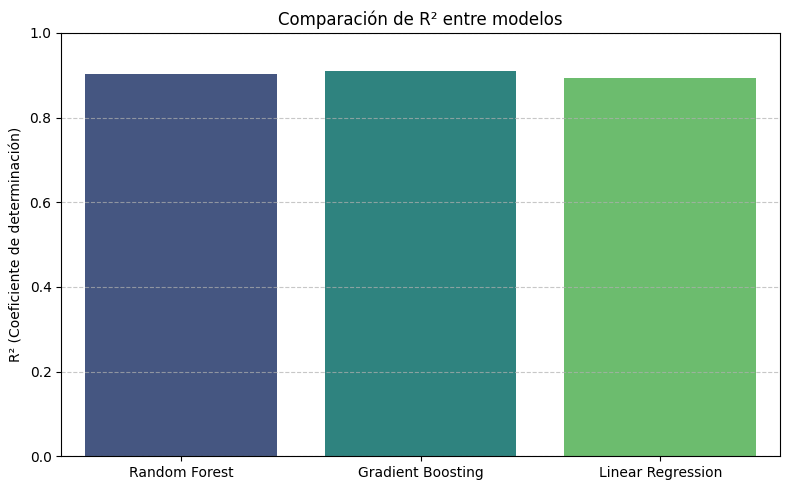

In [44]:
import seaborn as sns
# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Modelo': ['Random Forest', 'Gradient Boosting', 'Linear Regression'],
    'R²': [r2, gbr_r2, lr_r2]
})

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=results, x='Modelo', y='R²', palette='viridis')
plt.title('Comparación de R² entre modelos')
plt.ylim(0, 1)
plt.ylabel('R² (Coeficiente de determinación)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_27804\1792296343.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rmse_results, x='Modelo', y='RMSE', palette='magma')


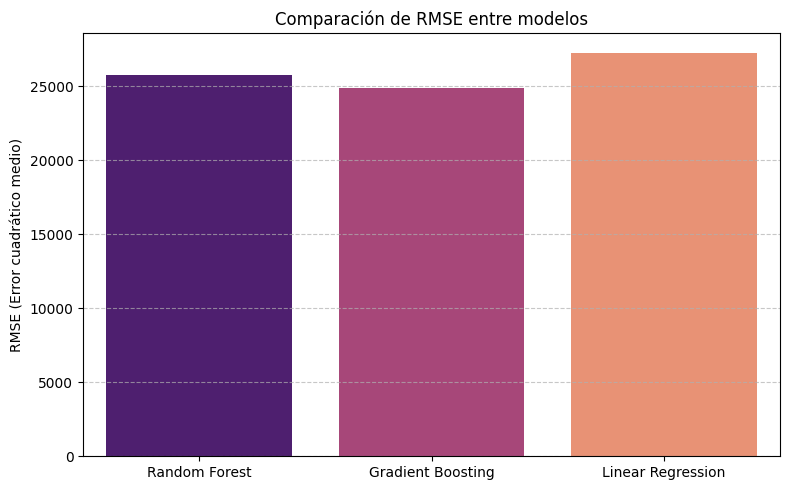

In [45]:
# Crear DataFrame con los RMSE
rmse_results = pd.DataFrame({
    'Modelo': ['Random Forest', 'Gradient Boosting', 'Linear Regression'],
    'RMSE': [rmse, gbr_rmse, lr_rmse]
})

# Gráfico de barras
plt.figure(figsize=(8, 5))
sns.barplot(data=rmse_results, x='Modelo', y='RMSE', palette='magma')
plt.title('Comparación de RMSE entre modelos')
plt.ylabel('RMSE (Error cuadrático medio)')
plt.xlabel('')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
from sklearn.model_selection import GridSearchCV



# Definimos la grilla de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.1, 0.5, 0.75, 1],
    'subsample': [0.75, 1]
}

# Modelo base
gbr_model = GradientBoostingRegressor(loss='squared_error', random_state=42)

# Grid Search con validación cruzada
grid_search = GridSearchCV(estimator=gbr_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Mejores hiperparámetros encontrados
print("✅ Mejores parámetros:", grid_search.best_params_)

✅ Mejores parámetros: {'learning_rate': 0.1, 'n_estimators': 400, 'subsample': 0.75}


In [47]:
# Predecir sobre validación con el mejor modelo
gbr_best = grid_search.best_estimator_
gbr_cv_preds = gbr_best.predict(X_val)

# Evaluación
gbr_cv_rmse = sqrt(mean_squared_error(y_val, gbr_cv_preds))
gbr_cv_r2 = r2_score(y_val, gbr_cv_preds)

print(f"🎯 Gradient Boosted Tuned - RMSE: {gbr_cv_rmse:.2f}")
print(f"🎯 Gradient Boosted Tuned - R²: {gbr_cv_r2:.4f}")

🎯 Gradient Boosted Tuned - RMSE: 24721.86
🎯 Gradient Boosted Tuned - R²: 0.9113


In [48]:
import joblib

# Guarda el modelo Gradient Boosting entrenado
joblib.dump(gbr_best, 'C:/Users/Sebastian/OneDrive/Documentos/vivienda-prediccion/models/model.pkl')

# Guarda el preprocesador
joblib.dump(preprocessor, 'C:/Users/Sebastian/OneDrive/Documentos/vivienda-prediccion/models/preprocessor.pkl')


['C:/Users/Sebastian/OneDrive/Documentos/vivienda-prediccion/models/preprocessor.pkl']